In [12]:
!pip install matplotlib==3.9.0

In [13]:
%matplotlib inline

from itertools import product
import imageio
import matplotlib.pyplot as plt
import numpy as np

## Utility Functions
You are provided some utility functions for rendering a cube and saving it as a GIF. Here is the summary of workflow:
*   **`generateCube()`**: Defines the unit cube with 3D lines.
*   **`renderCube()`**: Projects the 3D lines from the cube onto a 2D plane using the camera parameters and generates a plot.
*   **`generate_gif()`**: Creates a GIF by generating multiple frames of the rotating cube, using different rotation matrices from the input list.
*   **`xyrange()`**: Calculates the X and Y ranges of the 2D projected lines for adjusting the focal length if needed.
*   **`projectLines()`**: Projects 3D lines onto a 2D image plane based on camera parameters. *However, this function is not completed and you are assigned to implement it.*

In [22]:
def generate_gif(R, file_name='cube.gif'):
    """
    Generate a gif of a rotating cube from a list of rotation matrices.

    Input:  R: A list of 3x3 rotation matrices.
            file_name: file_name to save files to.
    Output: None
    """
    with imageio.get_writer(file_name, mode='I') as writer:
        for rot in R:
            fig = renderCube(f=15, t=(0, 0, 3), R=rot)
            # Now we can save it to a numpy array.
            fig.canvas.draw()
            img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')
            img = img.reshape(fig.canvas.get_width_height()[::-1] + (3, ))
            writer.append_data(img)


def renderCube(f=15,
               scaleFToSize=None,
               t=np.array([0, 0, -3]),
               R=np.eye(3),
               file_name=None): # use to plot render cub from gencube and use projectline
    """
    Renders a cube given camera instrinsics and extrinsics.

    Input:  f: focal length
            scaleFToSize: target size on the retina (sqrt of area)
            t: camera translation (3x1 numpy array)
            R: camera rotation (3x3 numpy array)
            file_name: file path to save image (if provided)

    Output: Matplotlib figure handle
    """
    # Render the cube
    L = generateCube()
    t = np.array(t)
    pL = projectLines(f, R, t,L)

    if scaleFToSize is not None:
        # Then adjust f so that the image is the right size
        xRange, yRange = xyrange(pL)
        geoMean = (xRange * yRange)**0.5
        f = (f / geoMean) * scaleFToSize
        # re-render with the right focal length
        pL = projectLines(f, R, t, L)

    # Generate plot
    fig = plt.figure()
    plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0], t[1], t[2], f))
    for i in range(pL.shape[0]):
        u1, v1, u2, v2 = pL[i, :]
        plt.plot((u1, u2), (v1, v2), linewidth=2)

    # Format plot
    plt.axis('square')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Save to file if filename is provided
    if file_name:
        plt.savefig(file_name)

    return fig


def generateCube(): # like blueprint return point on 3d have 12 line but return 24,6 cuz A->b and B->A 
    """
    Generates the lines for a unit cube.
    Output: np array of lines.
    """
    lines = []
    for x, y, z in product([0, 1], [0, 1], [0, 1]):
        # all corners, check changing all the directions
        # if in the cube, keep, but then center at 0
        for dx, dy, dz in [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0),
                           (0, 0, 1), (0, 0, -1)]:
            xp, yp, zp = x + dx, y + dy, z + dz 
            if min([xp, yp, zp]) >= 0 and max([xp, yp, zp]) <= 1:
                lines.append(
                    (x - 0.5, y - 0.5, z - 0.5, xp - 0.5, yp - 0.5, zp - 0.5))
    return np.vstack(lines)


def xyrange(pL): #
    # Returns the X and Y ranges for a line
    X, Y = np.vstack([pL[:, 0], pL[:, 2]]), np.vstack([pL[:, 1], pL[:, 3]])
    return np.max(X) - np.min(X), np.max(Y) - np.min(Y)


def projectLines(f, R, t, L): #L = genetratecube and use fot project to 2d use intrinsic and extrinsic
    """
    Projects lines using the camera intrinsic and extrinsic parameters.
    Input:  f: focal length
            R: camera rotation (3x3 numpy array)
            t: camera translation (3x1 numpy array)
            L: Nx6 numpy array depicting N lines in 3D
    Output: 2D projection of lines (Nx4 numpy array)
    """
    K=np.array([[f,0,0],[0,f,0],[0,0,1]])
    print(K)
    pL = np.zeros((L.shape[0], 4))
    for i in range(L.shape[0]):
      pw1=L[i,:3]
      pw2=L[i,3:]
      #APPLY WITH EXTRINSIC
      pc1=np.dot(R,pw1)+t
      pc2=np.dot(R,pw2)+t
      #apply with intrinsic
      pp1=np.dot(K,pc1)
      pp2=np.dot(K,pc2)

      pp1=pp1/pp1[2]
      pp2=pp2/pp2[2]

      pL[i,:2]=pp1[:2]
      pL[i,2:]=pp2[:2]
    return np.vstack(pL)

In [15]:
projectLines(f=15,
               t=np.array([0, 0, -3]),
               R=np.eye(3),
               L=np.array([-0.5,-0.5,-0.5
                        ,-0.5,-0.5,-0.5]).reshape(1,-1))

[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


array([[2.14285714, 2.14285714, 2.14285714, 2.14285714]])

## **Task 1:** Complete `projectLines()`
Once you implement `projectLines()`, you can test it by executing the command below.

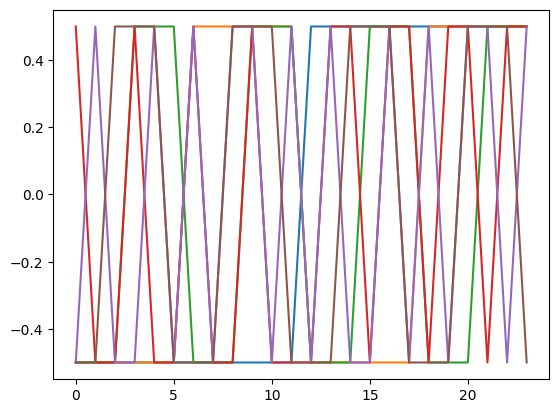

In [16]:
_ = generateCube()
plt.plot(_)

[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


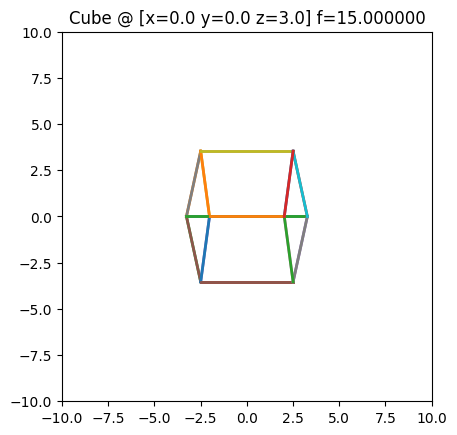

In [17]:
__=renderCube(t=(0,0,3),R=rotX(45)) 

[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


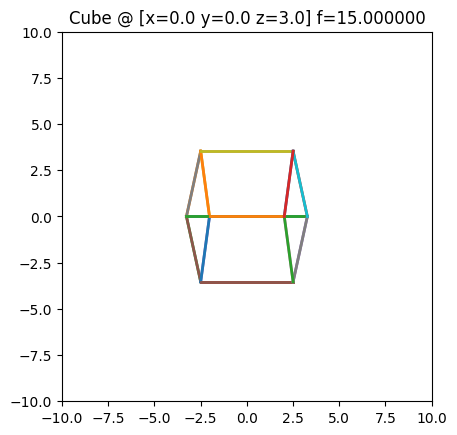

In [18]:
__=renderCube(t=(0,0,3),R=rotX(45))

## **Task 2:** Rotation Matrices
Complete the following functions which generate 3D rotation along the X, Y, and Z axis.

In [19]:
def rotX(theta):
    """
    Generate 3D rotation matrix about X-axis
    Input:  theta: rotation angle about X-axis
    Output: Rotation matrix (3 x 3 array)
    """
    theta=np.radians(theta) #in numpy cal radian not degreee change degree to radiant
    Rx = np.eye(3) #eye= iden matrix
    Rx[1][1]=np.cos(theta)
    Rx[1][2]=-1*np.sin(theta)
    Rx[2][1]=np.sin(theta)
    Rx[2][2]=np.cos(theta)
    return Rx


def rotY(theta):
    """
    Generate 3D rotation matrix about Y-axis
    Input:  theta: rotation angle along y-axis
    Output: Rotation matrix (3 x 3 array)
    """
    Ry = np.eye(3)
    theta=np.radians(theta)
    Ry[0,0]=np.cos(theta)
    Ry[0,2]=np.sin(theta)
    Ry[2,0]=-1*np.sin(theta)
    Ry[2,2]=np.cos(theta)
    return Ry


def rotZ(theta):
    """
    Generate 3D rotation matrix about Z-axis
    Input:  theta: rotation angle along Z-axis
    Output: Rotation matrix (3 x 3 array)
    """
    Rz = np.eye(3)
    theta=np.radians(theta)
    Rz[0][0]=np.cos(theta)
    Rz[0][1]=-1*np.sin(theta)
    Rz[1][0]=np.sin(theta)
    Rz[1][1]=np.cos(theta)
    return Rz

In [20]:
print("Rotation X 90°:")
print(rotX(90))

print("\nRotation Y 90°:")
print(rotY(90))

print("\nRotation Z 90°:")
print(rotZ(90))


Rotation X 90°:
[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]

Rotation Y 90°:
[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]

Rotation Z 90°:
[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


## **Task 3:** Rotate the cube about the Y axis
From the given code segment below, you are assigned to generate `cube.gif` of a cube rotating around itself.

[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


/tmp/ipython-input-22-2388873902.py:14: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')
/tmp/ipython-input-22-2388873902.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')


[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


/tmp/ipython-input-22-2388873902.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


KeyboardInterrupt: 

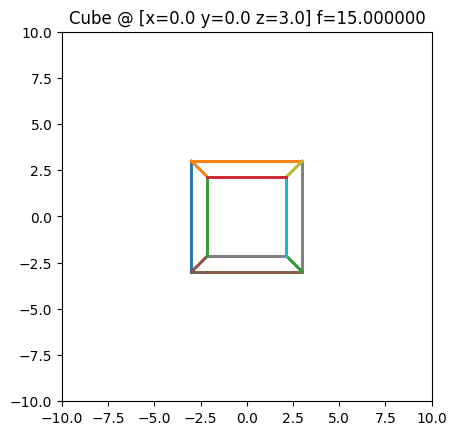

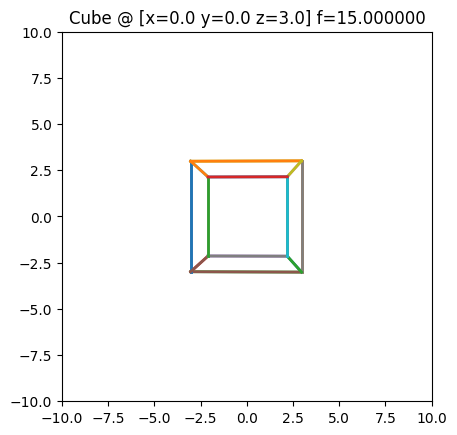

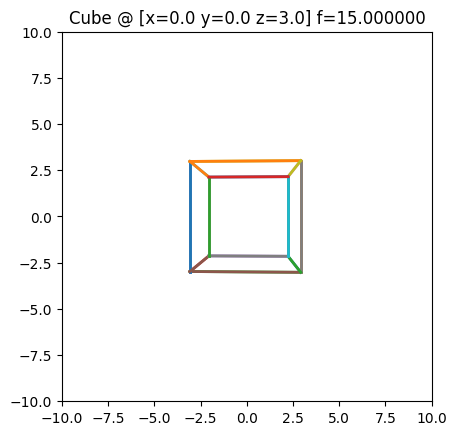

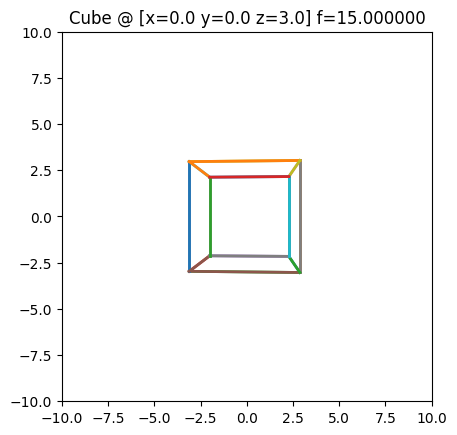

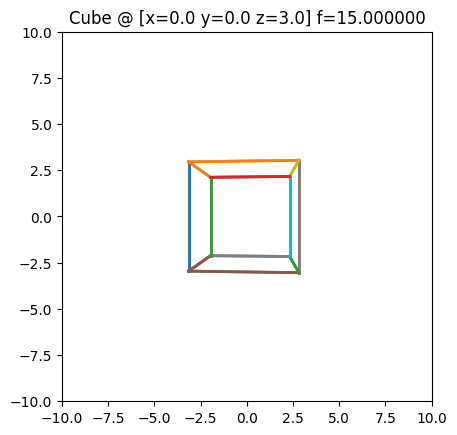

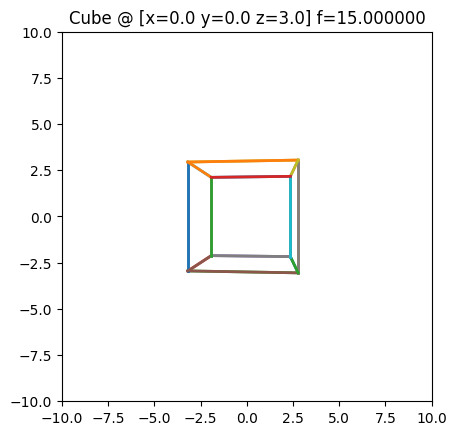

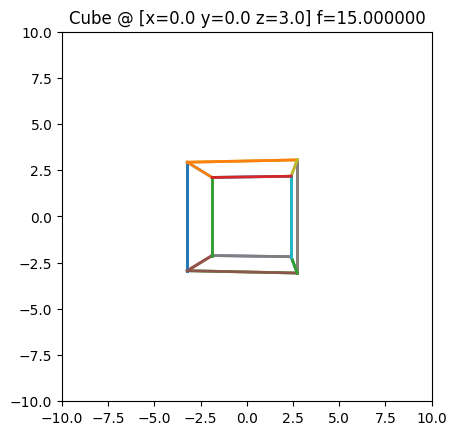

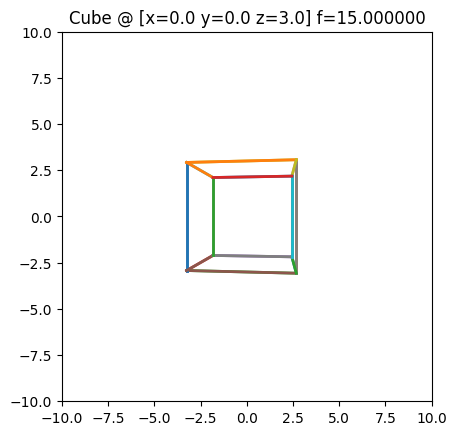

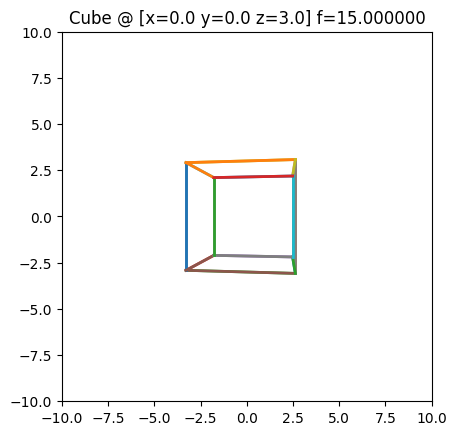

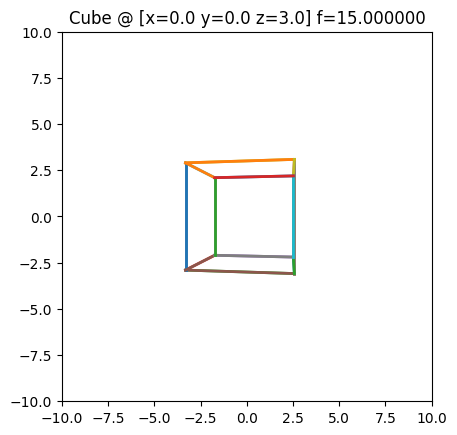

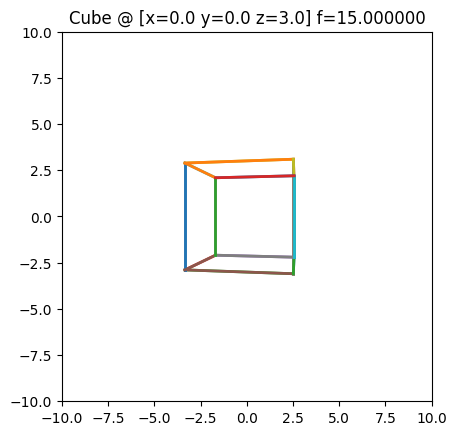

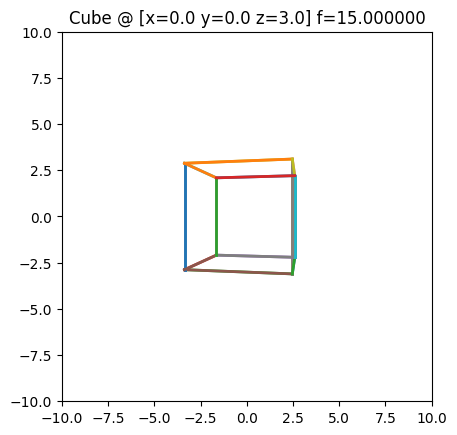

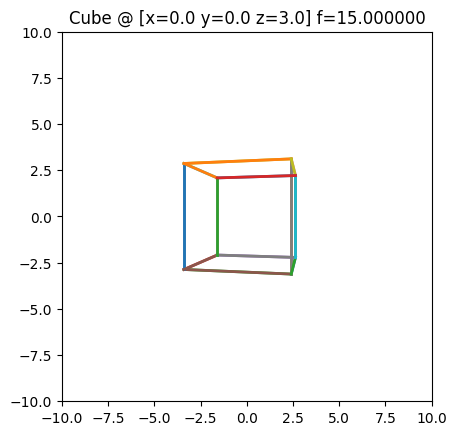

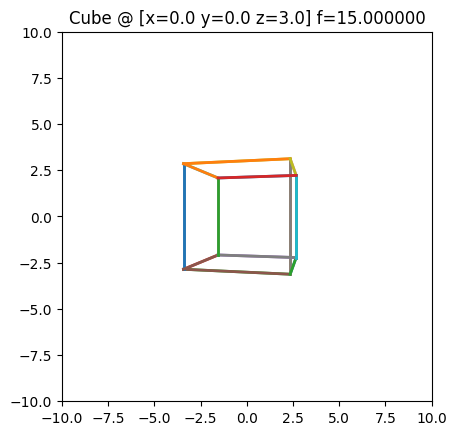

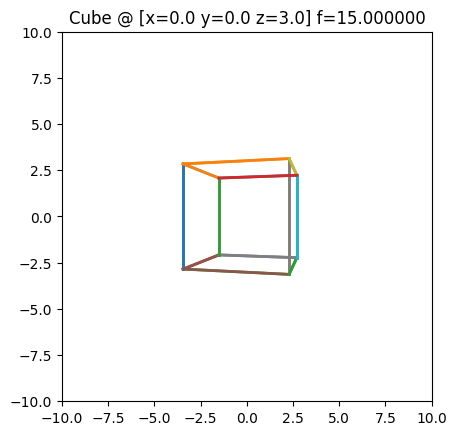

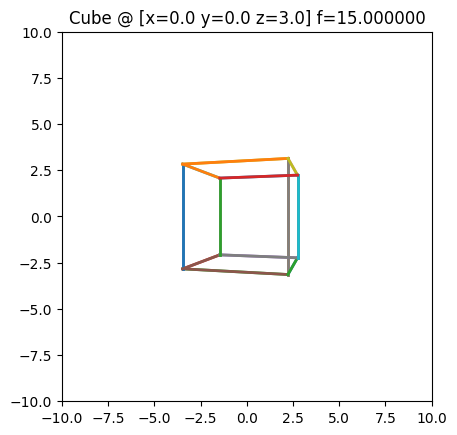

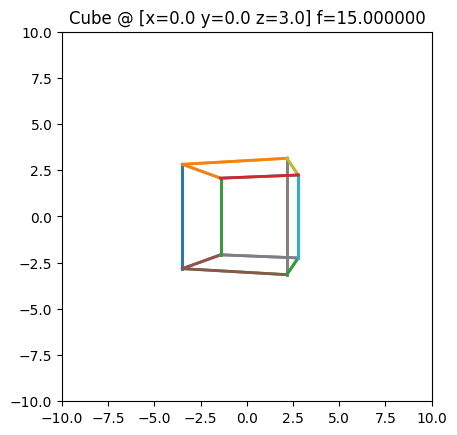

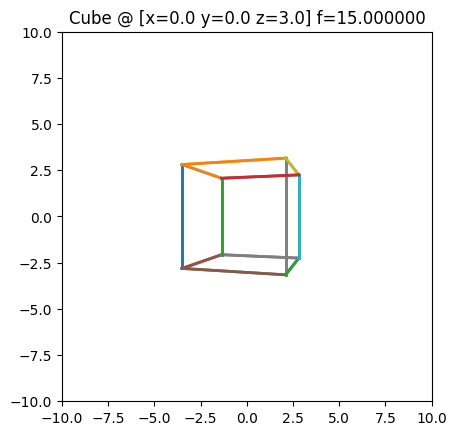

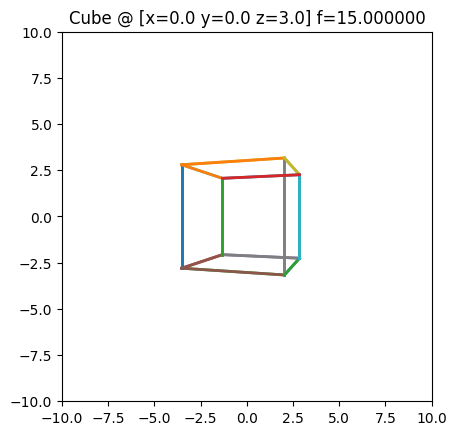

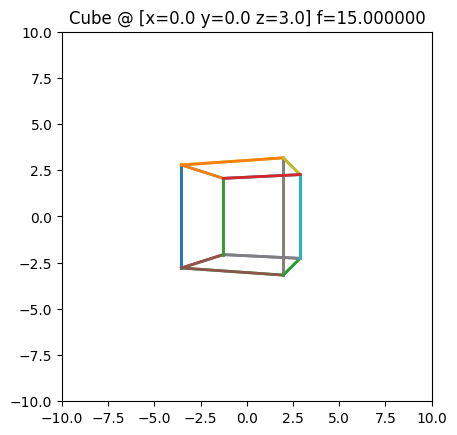

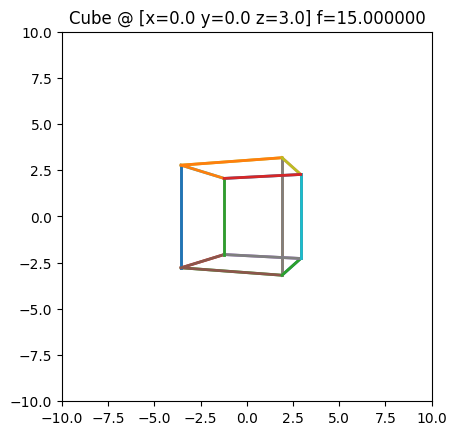

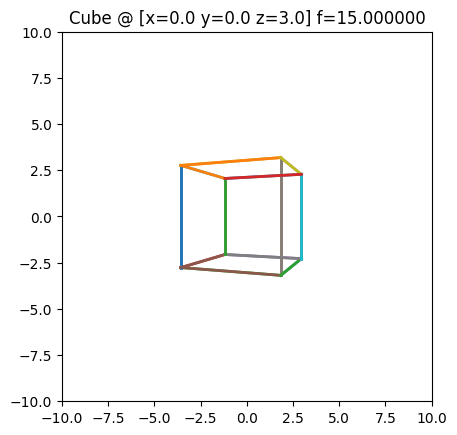

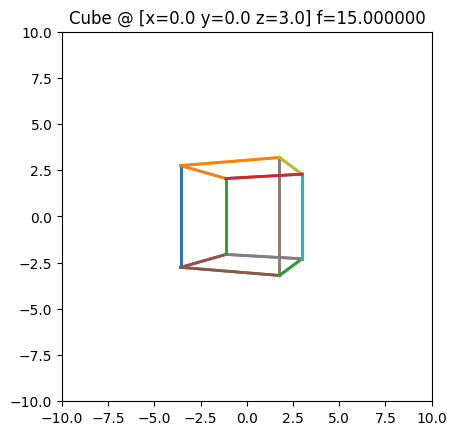

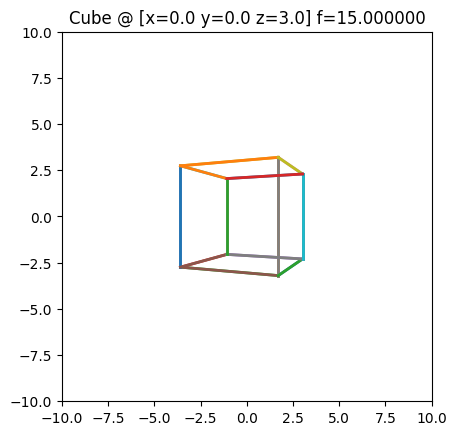

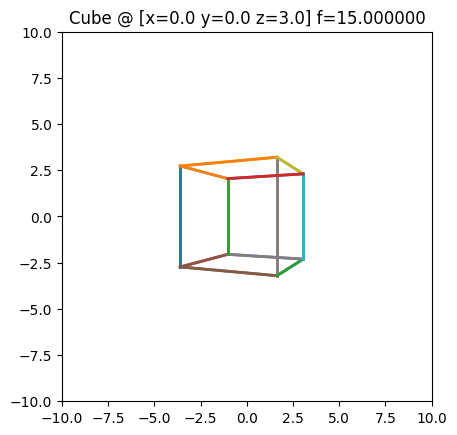

<Figure size 640x480 with 0 Axes>

In [24]:
Rs = np.empty((0,3,3))

# TODO: Use rotY() to generate cube.gif
for i in range(-90,90+1):
  R=rotY(i)
  R=np.expand_dims(R,axis=0)
  Rs=np.append(Rs,R,axis=0)

generate_gif(Rs, "1.gif")

## **Task 4:** Combining rotations
Let θ = π/4, consider the following two transformations:

*   rotX(theta), followed by rotY(theta)
*   rotY(theta), followed by rotX(theta)

Using renderCube() in the same way, plot the resulting view of the cube from two transformations.


[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]
[[15  0  0]
 [ 0 15  0]
 [ 0  0  1]]


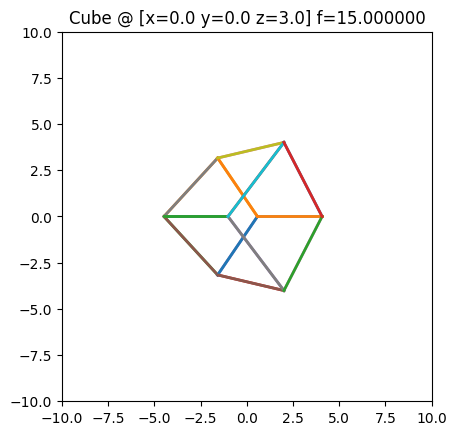

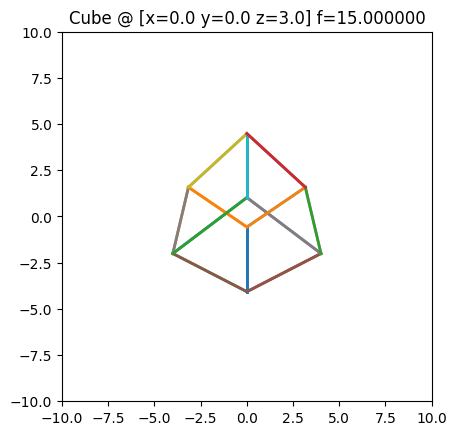

In [27]:
# Rxy = np.eye(3)
Rxy=np.dot(rotY(45),rotX(45))
# Ryx = np.eye(3)
Ryx=np.dot(rotX(45),rotY(45))

# TODO:  Use rotX() and rotY() sequentially to check
# the commutative property of Rotation Matrices

_ = renderCube(f=15, t=(0, 0, 3), R=Rxy)
_ = renderCube(f=15, t=(0, 0, 3), R=Ryx)

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

C = np.dot(A, B)  # หรือ A @ B
print(C)
